In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('matches.csv')

In [48]:
data.shape

(1878, 9)

In [49]:
data.head(5)

,Berlin,Frankfurt,2-1,2.21,3.05,2.92,1.31,2.72,13:18
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13:15
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12:42
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.2,1.51,2.15,12:39
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12:36
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12:27


In [50]:
replacers = ['team1','team2','score','team1_odds','x_odds','team2_odds','under','over','time']
cols = data.columns

for i in range(len(cols)):
    data.rename(columns={cols[i] : replacers[i]},inplace=True)

In [51]:
data.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13:15
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12:42
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.2,1.51,2.15,12:39
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12:36
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12:27


In [52]:
data.isnull().sum()

team1         0
team2         0
score         0
team1_odds    0
x_odds        0
team2_odds    0
under         0
over          0
time          0
dtype: int64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team1       1878 non-null   object 
 1   team2       1878 non-null   object 
 2   score       1878 non-null   object 
 3   team1_odds  1878 non-null   object 
 4   x_odds      1878 non-null   object 
 5   team2_odds  1878 non-null   object 
 6   under       1878 non-null   float64
 7   over        1878 non-null   float64
 8   time        1878 non-null   object 
dtypes: float64(2), object(7)
memory usage: 132.2+ KB


In [57]:
data['team1_odds'] = data['team1_odds'].astype(np.float64)
data['x_odds'] = data['x_odds'].astype(np.float64)
data['team2_odds'] = data['team2_odds'].astype(np.float64)

In [55]:
data.loc[data['team1_odds'] == 'LondonGunners\xa02.6\xa0']

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
36,Villa,1-1,Lions,LondonGunners 2.6,2.52,2.95,1.34,2.59,10:12


In [56]:
data.drop(index = 36,inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1877 entries, 0 to 1877
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team1       1877 non-null   object 
 1   team2       1877 non-null   object 
 2   score       1877 non-null   object 
 3   team1_odds  1877 non-null   float64
 4   x_odds      1877 non-null   float64
 5   team2_odds  1877 non-null   float64
 6   under       1877 non-null   float64
 7   over        1877 non-null   float64
 8   time        1877 non-null   object 
dtypes: float64(5), object(4)
memory usage: 146.6+ KB


In [62]:
data['time'] = pd.to_datetime(data['time'],format = '%H:%M')
data['time'] = data['time'].dt.hour

In [60]:
data.iloc[780:790,:]

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
781,Μαρσέιγ,Ντόρτμουντ,3-2,2.57,2.50,3.05,1.40,2.41,08:51
782,ΓουέστΧαμ,Λέστερ,1-1,2.81,2.23,3.15,1.49,2.18,08:48
783,Βόλος,Τρίπολη,3-2,2.32,2.81,3.00,1.37,2.50,08:45
784,Χόφενχαϊμ,Ναντ,0-2,1.98,3.40,3.10,1.40,2.41,08:42
785,Μιλάνο,MunichReds,0-3,2.72,2.28,3.20,1.52,2.13,08:39
786,Πόρτο,ManchesterBlue,1-2,2.72,2.28,3.20,1.52,2.13,08:36
787,Basaksehir,ΠράσινοιΛευκωσίας,1-3,2.09,3.00,3.20,1.52,2.12,08:33
788,Χόφενχαϊμ,Monchengladbach,1-1,2.48,2.56,3.05,1.43,2.33,308:27
789,Frankfurt,Φράιμπουργκ,2-1,2.42,2.72,2.95,1.34,2.59,08:24
790,Partisans,BocaBoys,2-1,2.66,2.39,3.05,1.43,2.33,08:18


In [61]:
data.drop(index=788,inplace=True)

In [63]:
data.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.20,1.51,2.15,12
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12


In [76]:
team_1_goals = data['score'].str[0].values.astype(np.int32)
team_2_goals = data['score'].str[2].values.astype(np.int32)



In [77]:
team_1_goals

array([0, 2, 2, ..., 0, 1, 1])

In [78]:
winner = []

for i in range(len(team_1_goals)):
    if team_2_goals[i] < team_1_goals[i]:
        winner.append(1)
    elif team_2_goals[i] > team_1_goals[i]:
        winner.append(2)
    else:
        winner.append(0)
    
        

In [79]:
data['winner'] = winner

In [80]:
data.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time,winner
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,2
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,1
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.20,1.51,2.15,12,1
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12,2
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12,2


In [81]:
total_goals = []

for i in range(len(team_1_goals)):
    total_goals.append(int(team_1_goals[i] + team_2_goals[i]))

In [82]:
data['goals'] = total_goals

In [83]:
data.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time,winner,goals
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,2,2
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,1,3
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.20,1.51,2.15,12,1,3
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12,2,1
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12,2,4


In [84]:
uo = []

for i in range(len(total_goals)):
    if total_goals[i] > 2.5:
        uo.append(1)
    else:
        uo.append(0)

In [85]:
data['over_2.5'] = uo

In [86]:
data.head(5)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time,winner,goals,over_2.5
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,2,2,0
1,Ναντ,Χόφενχαϊμ,2-1,2.76,2.33,3.05,1.40,2.41,12,1,3,1
2,TorinoJuve,Μιλάνο,2-1,2.12,2.99,3.20,1.51,2.15,12,1,3,1
3,Περιστέρι,BetisGreens,0-1,2.44,2.54,3.15,1.49,2.18,12,2,1,0
4,FCBergamo,Νάπολι,1-3,2.66,2.39,3.05,1.43,2.33,12,2,4,1


### visualizations 

In [87]:
import matplotlib.pyplot as plt

import seaborn as sns

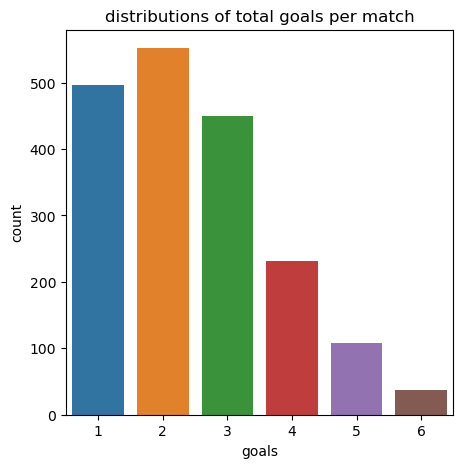

In [88]:
plt.figure(figsize=(5,5))
sns.countplot(x='goals',data=data)
plt.title('distributions of total goals per match')
plt.show()

In [93]:
p1 = data.loc[data['goals'] > 2.5].shape[0]
p2 = data.shape[0]

1876

In [96]:
print(f'{p1/p2*100} the percentage of matches with goals over')

44.083155650319824 the percentage of matches with goals over 


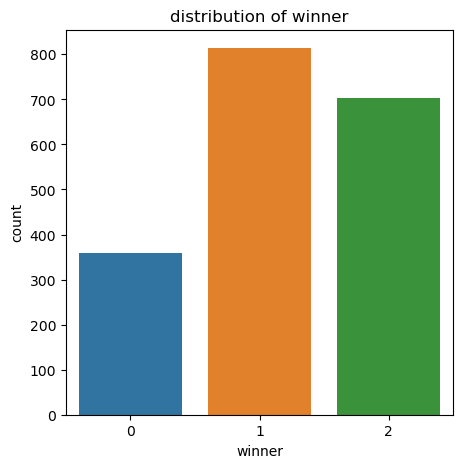

In [97]:
plt.figure(figsize=(5,5))
sns.countplot(x='winner',data=data)
plt.title('distribution of winner')
plt.show()

In [99]:
data.team1.nunique()

105

In [100]:
data.team2.nunique()

104

### barcelona

In [101]:
barca1 = data.loc[data['team1'] == 'Μπαρτσελόνα']
barca2 = data.loc[data['team2'] == 'Μπαρτσελόνα']

frames = [barca1,barca2]

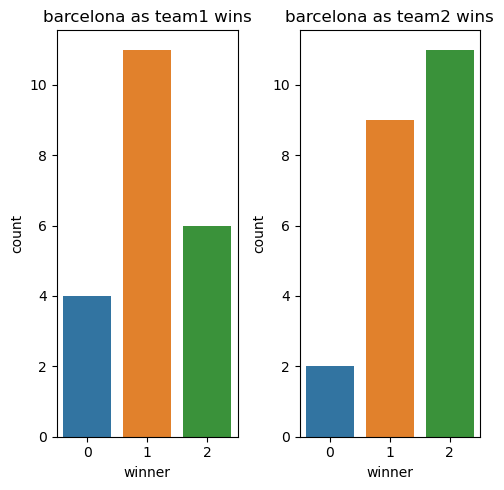

In [105]:
plt.figure(figsize=(5,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x='winner' , data=frames[i])
    plt.title(f'barcelona as team{i+1} wins')
plt.tight_layout()
plt.show()

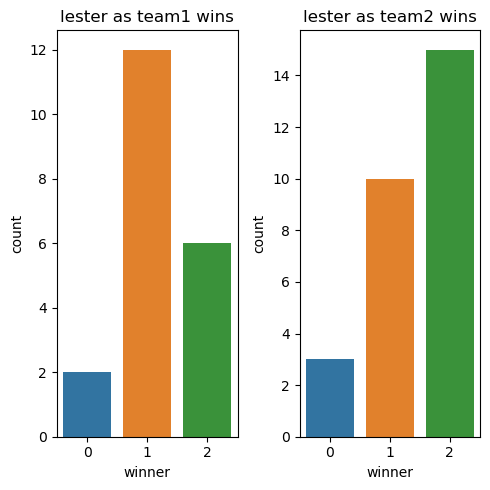

In [107]:
barca1 = data.loc[data['team1'] == 'Λέστερ']
barca2 = data.loc[data['team2'] == 'Λέστερ']

frames = [barca1,barca2]

plt.figure(figsize=(5,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    sns.countplot(x='winner' , data=frames[i])
    plt.title(f'lester as team{i+1} wins')
plt.tight_layout()
plt.show()

In [109]:
data.team2.nunique(),data.team1.nunique()

(104, 105)

In [110]:
data.head(1)

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time,winner,goals,over_2.5
0,ΔικέφαλοςΒορρά,Μπαρτσελόνα,0-2,2.94,2.17,3.15,1.46,2.25,13,2,2,0


In [111]:
team_sacces = dict()

for i in data.team2.unique():
    wins_as_team_1 = 0
    total_matches_as_team_1 = 0
    
    wins_as_team_2 = 0
    total_matches_as_team_2 = 0
    
    
    team1 = data.loc[data['team1'] == i ]
    vals = team1.values
    
    for j in vals:
        if j[9] == 1:
            wins_as_team_1 += 1
        total_matches_as_team_1 += 1
        
    
    team2 = data.loc[data['team2'] == i ]
    vals = team2.values
    
    for j in vals:
        if j[9] == 2:
            wins_as_team_2 += 1
        total_matches_as_team_2 += 1
    
    
    total_wins = wins_as_team_1 + wins_as_team_2
    total_matches = total_matches_as_team_1 + total_matches_as_team_2
    
    percent = total_wins/total_matches *100
    
    
    if i not in team_sacces.keys():
        team_sacces[i] = percent
        
    
    
    
    
        
    

In [112]:
team_sacces

{'Μπαρτσελόνα': 51.162790697674424,
 'Χόφενχαϊμ': 50.0,
 'Μιλάνο': 41.17647058823529,
 'BetisGreens': 46.666666666666664,
 'Νάπολι': 52.72727272727272,
 'TorinoJuve': 38.46153846153847,
 'Νότινγχαμ': 26.31578947368421,
 'Ghent': 34.78260869565217,
 'Λεβερκούζεν': 35.294117647058826,
 'Ηράκλειο': 46.42857142857143,
 'Βιγιαρεάλ': 37.5,
 'Τραμπζονσπόρ': 33.33333333333333,
 'Πράσινοι': 39.0625,
 'Παρί': 52.54237288135594,
 'Λίβερπουλ': 48.97959183673469,
 'Τσέλσι': 45.0,
 'VascoBlues': 39.58333333333333,
 'Λυών': 42.028985507246375,
 'Ένωση': 46.93877551020408,
 'ΓουέστΧαμ': 31.11111111111111,
 'Έβερτον': 28.57142857142857,
 'Ρόμα': 49.01960784313725,
 'Lipsia': 50.0,
 'InterBlues': 39.130434782608695,
 'Ρέιντζερς': 51.85185185185185,
 'Ερυθρόλευκοι': 36.53846153846153,
 'RedDevils': 36.84210526315789,
 'Νιούκαστλ': 47.05882352941176,
 'Λαμία': 40.909090909090914,
 'Τρίπολη': 46.42857142857143,
 'Rosenborg': 38.70967741935484,
 'Fener': 42.857142857142854,
 'Μπεσίκτας': 33.33333333333333,


In [115]:
dict(sorted(team_sacces.items() , key=lambda item:item[1]))

{'SportingLions': 19.047619047619047,
 'Κάλιαρι': 23.076923076923077,
 'Μάριμπορ': 25.0,
 'MadridAthletes': 25.0,
 'Αγρίνιο': 25.71428571428571,
 'Νότινγχαμ': 26.31578947368421,
 'DoriaBlues': 26.666666666666668,
 'LondonGunners': 27.027027027027028,
 'Σάλτσμπουργκ': 27.586206896551722,
 'Τορίνο': 27.77777777777778,
 'ΚίτρινοιΛευκωσίας': 28.000000000000004,
 'Έβερτον': 28.57142857142857,
 'Βόλος': 29.166666666666668,
 'Νίκαια': 29.629629629629626,
 'FCBergamo': 29.78723404255319,
 'Λειβαδιά': 30.0,
 'Βερόνα': 30.0,
 'Anderlecht': 30.434782608695656,
 'Μπρέντφορντ': 30.76923076923077,
 'ΓουέστΧαμ': 31.11111111111111,
 'NisCity': 31.57894736842105,
 'LisbonEagles': 31.818181818181817,
 'ΚίτρινοιΒορρά': 32.0,
 'Laziali': 32.075471698113205,
 'MunichReds': 32.6530612244898,
 'Τραμπζονσπόρ': 33.33333333333333,
 'Μπεσίκτας': 33.33333333333333,
 'Βαλένθια': 33.33333333333333,
 'ShakhtarUnited': 33.33333333333333,
 'Φράιμπουργκ': 33.87096774193548,
 'Ναντ': 33.89830508474576,
 'Rennais': 34.69

In [117]:
data.loc[data['team2'] =='KievWhites' ]

,team1,team2,score,team1_odds,x_odds,team2_odds,under,over,time,winner,goals,over_2.5
113,GalataLions,KievWhites,1-2,2.39,2.68,3.05,1.40,2.41,20,2,3,1
178,ManchesterBlue,KievWhites,0-1,1.89,3.60,3.20,1.44,2.29,22,2,1,0
205,Ντόρτμουντ,KievWhites,1-0,2.05,3.20,3.10,1.42,2.35,20,1,1,0
319,Ντόρτμουντ,KievWhites,0-2,2.05,3.20,3.10,1.42,2.35,19,2,2,0
415,FCBergamo,KievWhites,1-1,2.00,3.40,3.10,1.39,2.43,17,0,2,0
495,RedDevils,KievWhites,0-1,2.06,3.30,3.05,1.37,2.52,19,2,1,0
587,Frankfurt,KievWhites,0-1,2.24,2.84,3.10,1.45,2.27,20,2,1,0
634,Τραμπζονσπόρ,KievWhites,0-2,2.37,2.64,3.10,1.46,2.26,17,2,2,0
875,ΔικέφαλοςΒορρά,KievWhites,0-3,2.47,2.57,3.05,1.43,2.33,18,2,3,1
1085,TorinoJuve,KievWhites,2-4,2.00,3.30,3.15,1.45,2.28,20,2,6,1


In [120]:
team_sacces

{'Μπαρτσελόνα': 51.162790697674424,
 'Χόφενχαϊμ': 50.0,
 'Μιλάνο': 41.17647058823529,
 'BetisGreens': 46.666666666666664,
 'Νάπολι': 52.72727272727272,
 'TorinoJuve': 38.46153846153847,
 'Νότινγχαμ': 26.31578947368421,
 'Ghent': 34.78260869565217,
 'Λεβερκούζεν': 35.294117647058826,
 'Ηράκλειο': 46.42857142857143,
 'Βιγιαρεάλ': 37.5,
 'Τραμπζονσπόρ': 33.33333333333333,
 'Πράσινοι': 39.0625,
 'Παρί': 52.54237288135594,
 'Λίβερπουλ': 48.97959183673469,
 'Τσέλσι': 45.0,
 'VascoBlues': 39.58333333333333,
 'Λυών': 42.028985507246375,
 'Ένωση': 46.93877551020408,
 'ΓουέστΧαμ': 31.11111111111111,
 'Έβερτον': 28.57142857142857,
 'Ρόμα': 49.01960784313725,
 'Lipsia': 50.0,
 'InterBlues': 39.130434782608695,
 'Ρέιντζερς': 51.85185185185185,
 'Ερυθρόλευκοι': 36.53846153846153,
 'RedDevils': 36.84210526315789,
 'Νιούκαστλ': 47.05882352941176,
 'Λαμία': 40.909090909090914,
 'Τρίπολη': 46.42857142857143,
 'Rosenborg': 38.70967741935484,
 'Fener': 42.857142857142854,
 'Μπεσίκτας': 33.33333333333333,


In [129]:
success_ratio = pd.DataFrame({'name' :team_sacces.keys() , 'success': team_sacces.values() })

In [140]:
success_ratio.sort_values(by='success',ascending=False,inplace=True)

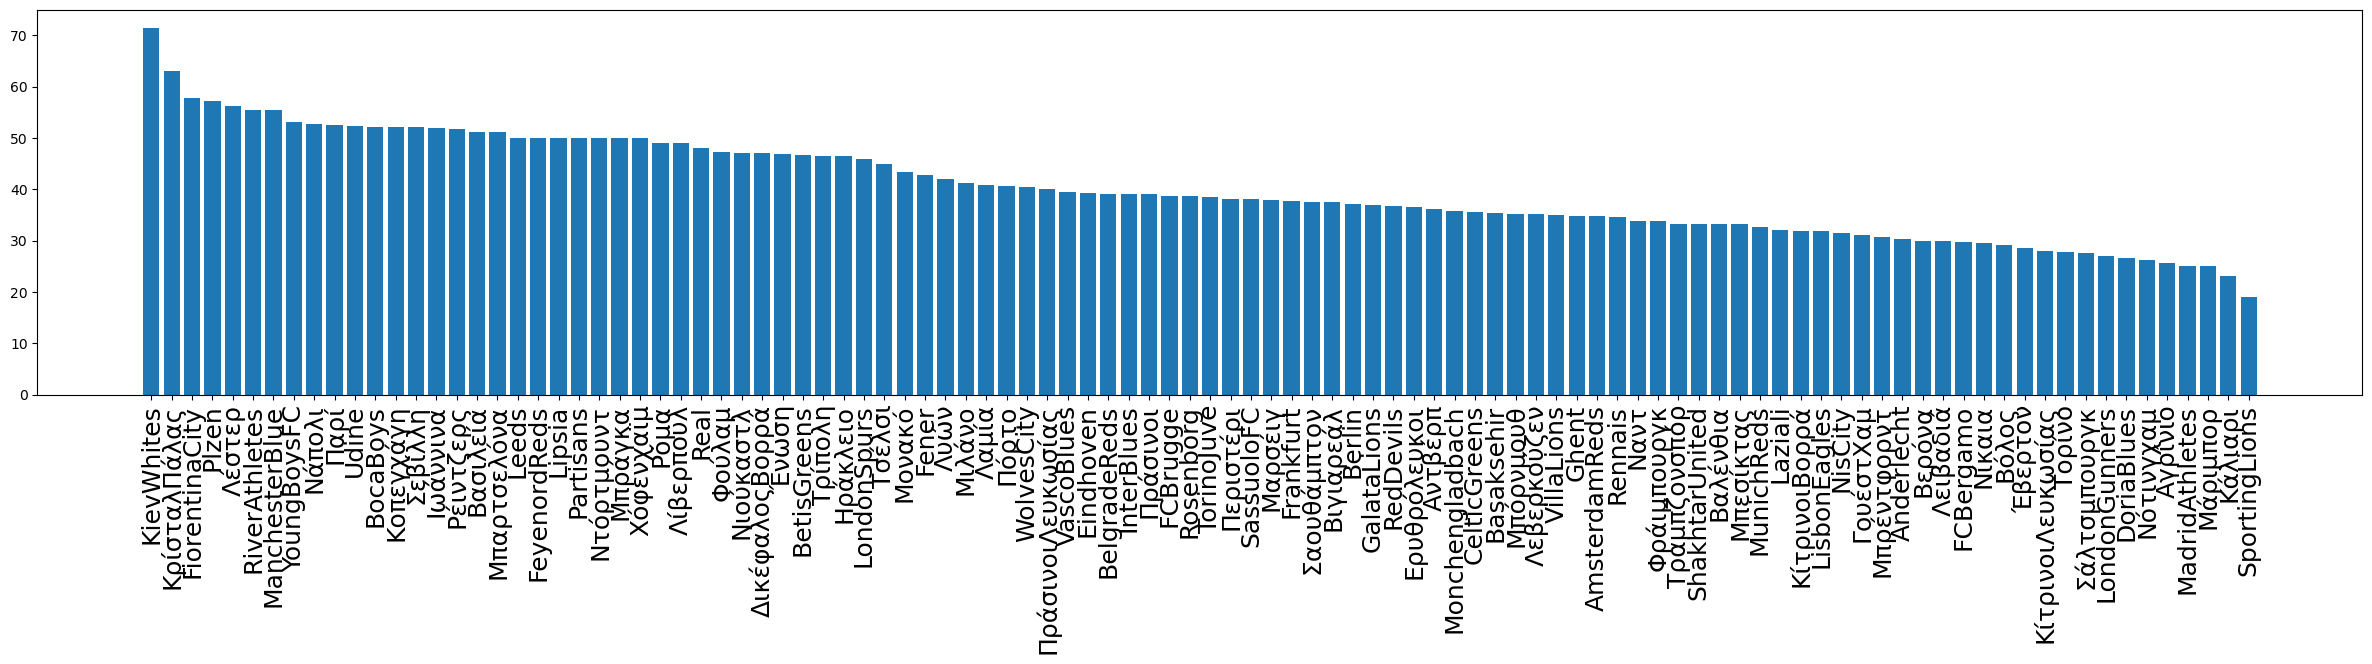

In [143]:
plt.figure(figsize=(30,5))
plt.bar(success_ratio['name'].values, success_ratio['success'].values)
plt.xticks(rotation=90,fontsize=18)
plt.show()